In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns')

In [4]:
df = pd.read_csv("data/loan_data_2007_2014.csv")
df.head()

C:\Users\iqbal\AppData\Local\Temp\ipykernel_9396\4100477804.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#### Droping feature

In [7]:
df = df.drop(["Unnamed: 0","id","member_id","url","zip_code",
              "open_il_24m","open_il_12m","open_il_6m","open_rv_12m",
              "open_rv_24m","total_bal_il","il_util","max_bal_bc",
              "all_util","inq_fi","verification_status_joint","open_acc_6m",
              "mths_since_rcnt_il","total_cu_tl","inq_last_12m","sub_grade"],axis=1)
df.head

<bound method NDFrame.head of         loan_amnt  funded_amnt  ...  tot_cur_bal total_rev_hi_lim
0            5000         5000  ...          NaN              NaN
1            2500         2500  ...          NaN              NaN
2            2400         2400  ...          NaN              NaN
3           10000        10000  ...          NaN              NaN
4            3000         3000  ...          NaN              NaN
...           ...          ...  ...          ...              ...
466280      18400        18400  ...     294998.0          29900.0
466281      22000        22000  ...     221830.0          39400.0
466282      20700        20700  ...      73598.0          13100.0
466283       2000         2000  ...     591610.0          53100.0
466284      10000        10000  ...      57477.0          16000.0

[466285 rows x 54 columns]>

## Data Cleaning and fill nan


#### Split Data Categorical

In [8]:
# split data for categorical datatype
cat = df.select_dtypes(exclude=np.number)
# split data for numerical datatype
numerical = df.select_dtypes(include=np.number)
cat

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,60 months,C,Financial Advisor,4 years,MORTGAGE,Source Verified,Jan-14,Current,n,NaN,debt_consolidation,Debt consolidation,TX,Apr-03,w,Jan-16,Feb-16,Jan-16,INDIVIDUAL
466281,60 months,D,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,Verified,Jan-14,Charged Off,n,NaN,debt_consolidation,Debt consolidation,TN,Jun-97,f,Dec-14,NaN,Jan-16,INDIVIDUAL
466282,60 months,D,patrol,7 years,MORTGAGE,Verified,Jan-14,Current,n,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,OH,Dec-01,f,Jan-16,Feb-16,Dec-15,INDIVIDUAL
466283,36 months,A,Server Engineer Lead,3 years,OWN,Verified,Jan-14,Fully Paid,n,NaN,credit_card,Credit card refinancing,CA,Feb-03,w,Dec-14,NaN,Apr-15,INDIVIDUAL


In [9]:
from Charlotte.preprocessing import fill_nan
cat_fillted = fill_nan(cat)
cat_fillted.head()

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,Teacher,10+ years,RENT,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,Jan-85,f,Jan-15,Feb-16,Jan-16,INDIVIDUAL
1,60 months,C,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,Apr-99,f,Apr-13,Feb-16,Sep-13,INDIVIDUAL
2,36 months,C,Teacher,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,,small_business,real estate business,IL,Nov-01,f,Jun-14,Feb-16,Jan-16,INDIVIDUAL
3,36 months,C,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,Feb-96,f,Jan-15,Feb-16,Jan-15,INDIVIDUAL
4,60 months,B,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


In [10]:
numerical_filled = fill_nan(numerical)
numerical_filled.head()

c:\Users\iqbal\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,34.10443,74.306012,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,42.852547,1,NaN,NaN,0.0,191.913517,138801.713385,30379.087771
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,34.10443,74.306012,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,42.852547,1,NaN,NaN,0.0,191.913517,138801.713385,30379.087771
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,34.10443,74.306012,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,42.852547,1,NaN,NaN,0.0,191.913517,138801.713385,30379.087771
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.00000,74.306012,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,42.852547,1,NaN,NaN,0.0,191.913517,138801.713385,30379.087771
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.00000,74.306012,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,42.852547,1,NaN,NaN,0.0,191.913517,138801.713385,30379.087771


In [11]:
# droping feature not useful
numerical_filled = numerical_filled.drop(["annual_inc_joint","dti_joint",
                                          "collections_12_mths_ex_med","acc_now_delinq",
                                          "collection_recovery_fee"],axis=1)
numerical_filled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,mths_since_last_major_derog,policy_code,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,34.10443,74.306012,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,42.852547,1,191.913517,138801.713385,30379.087771
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,34.10443,74.306012,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,119.66,42.852547,1,191.913517,138801.713385,30379.087771
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,34.10443,74.306012,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,42.852547,1,191.913517,138801.713385,30379.087771
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.00000,74.306012,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,357.48,42.852547,1,191.913517,138801.713385,30379.087771
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.00000,74.306012,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,42.852547,1,191.913517,138801.713385,30379.087771


## Exploratory data analysis

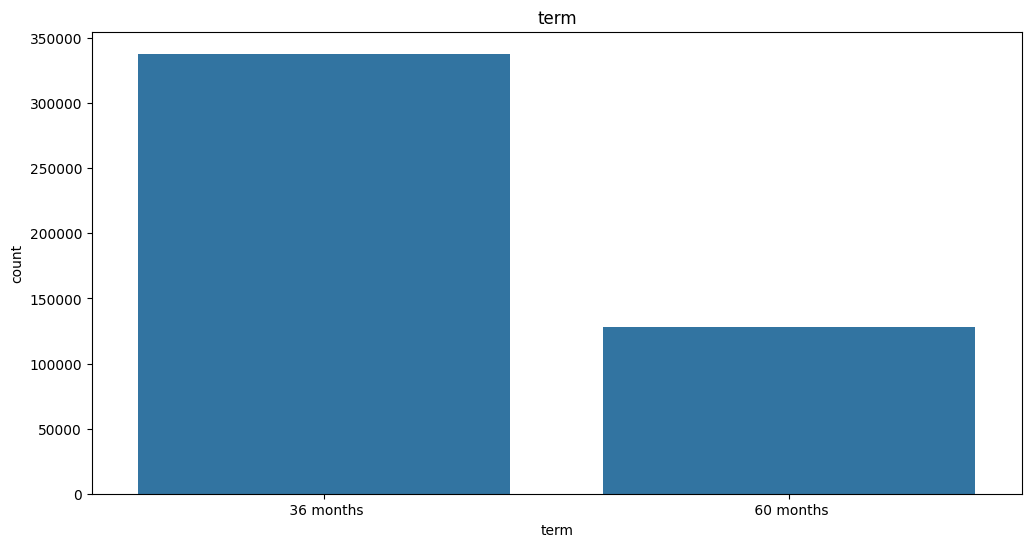

In [12]:
from Charlotte.explor_visuals import Countplot_Visual
# visual count
Countplot_Visual(cat_fillted["term"],title="Count of Term")